In [25]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import scipy.stats as stats
from sklearn import linear_model #For predictive modelling
from sklearn import preprocessing
from sklearn import tree
pd.options.mode.chained_assignment = None  # Disable SettingWithCopyWarning
import matplotlib.pyplot as plt
#The scipy. stats is the SciPy sub-package. It is mainly used for probabilistic distributions and statistical operations. 

In [26]:
#Load DataFrame
df = pd.read_csv("cirrhosis.csv")

In [27]:
df.shape

(418, 20)

In [28]:
#Titles of all columns
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [29]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [30]:
#Exploring isnull for drug

df[df['Drug'].isnull()]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,313,4062,C,NaN,21915,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0
315,316,2071,D,NaN,27394,F,NaN,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,317,3030,C,NaN,22646,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [31]:
#describe data(numerical columns)

df.describe() #To describe numerical data

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [32]:
#describe data(categorical columns)
df['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

In [33]:
#describe categorical columns of data

#df.dtypes....List all columns with the type of data types each column is
#df.dtypes == 'object'  # To list all the data in form of boolen, where those that are objects are "True"
#df.dtypes[df.dtypes == 'object']..list out only data types that are objects
df[df.dtypes[df.dtypes == 'object'].index].describe() #Frequency table describing all categorical variables

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [34]:
df.dtypes[df.dtypes == 'object'].index

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

In [35]:
df['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

In [36]:
df['Drug'].describe()

count                 312
unique                  2
top       D-penicillamine
freq                  158
Name: Drug, dtype: object

In [37]:
df['Drug'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414     True
415     True
416     True
417     True
Name: Drug, Length: 418, dtype: bool

In [38]:
np.where(df["Drug"].isnull() == True)

(array([312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
        325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
        338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350,
        351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363,
        364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376,
        377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
        390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
        403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
        416, 417]),)

In [39]:
# To get the row indexes of the missing values with np.where()
missing=np.where(df["Drug"].isnull() == True)
len(missing[0])

106

In [40]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [41]:
#Deleting rows where drug is null

df = df[df["Drug"].notnull()]

In [42]:
#New shape of data
df.shape

(312, 20)

In [43]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [44]:
#To assess the number of counts in each numerical varianble and assess what to do
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,284.000000,312.000000,310.000000,312.000000,312.000000,282.000000,308.000000,312.000000,312.000000
mean,156.500000,2006.362179,18269.442308,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051
std,90.210864,1123.280843,3864.805407,4.530315,231.944545,0.419892,85.613920,2140.388824,56.699525,65.148639,95.608742,1.004323,0.877880
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,78.750000,1191.000000,15427.750000,0.800000,249.500000,3.310000,41.250000,871.500000,80.600000,84.250000,199.750000,10.000000,2.000000
50%,156.500000,1839.500000,18187.500000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,234.250000,2697.250000,20715.000000,3.425000,400.000000,3.800000,123.000000,1980.000000,151.900000,151.000000,322.500000,11.100000,4.000000
max,312.000000,4556.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


In [45]:
#I have to transform age
#The Age is currently in days.
#Convert to years by dividing by 365.25
df['Age'] = df['Age'] / 365.25
#To round the age off to nearest whole number without decimal
df['Age'] = df['Age'].round().astype(int)


In [46]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


array([[<Axes: title={'center': 'Platelets'}>]], dtype=object)

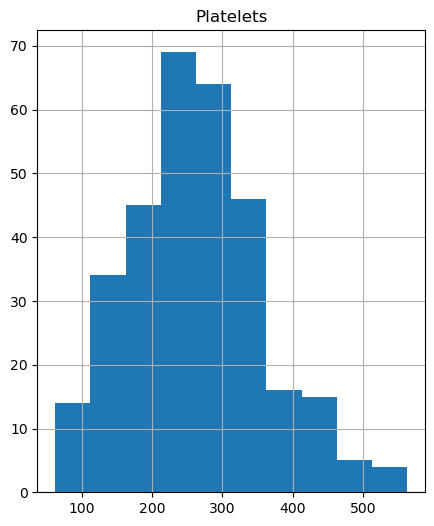

In [47]:
#Cholesterol, Copper, Trigliceride and Platelets are the numerical variable with missing values.
#I will create histogram for each and "crudely" check if the values is normally distributed I will fill spaces with mean else, I will fill with median

#Distribution of cholesterol is not normally distrubuted, hence missing values will be replaced with median
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

#Distribution of Copper is not normally distrubuted, hence missing values will be replaced with median
df['Copper'].fillna(df['Copper'].median(), inplace=True)

#Distribution of Tryglicerides is not normally distrubuted, hence missing values will be replaced with median
df['Tryglicerides'].fillna(df['Tryglicerides'].median(), inplace=True)

#Distribution of Platelets is almost normally distrubuted, hence missing values will be replaced with mean
df['Platelets'].fillna(df['Platelets'].mean(), inplace=True)


df.hist(column='Platelets',    # Column to plot
                   figsize=(5,6),   # Plot size
                   bins=10,
       )         # Number of histogram bins

In [48]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [49]:
#df[df.dtypes[df.dtypes == 'object'].index].describe()
df[df.dtypes[df.dtypes == 'object'].index].describe()
#This shows all the categorical variables are filled

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,312,312,312,312,312,312,312
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,168,158,276,288,160,222,263


In [50]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

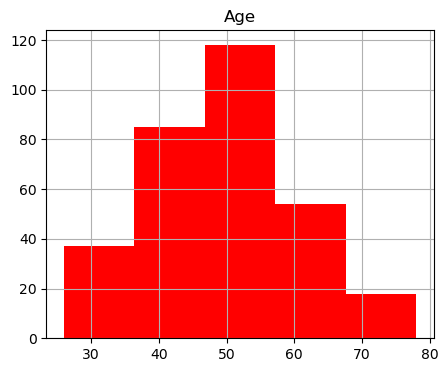

In [51]:
#Histogram for age
df.hist(column='Age',     #Column to plot
       figsize=(5,4),     #Plot size
       bins=5,
       color='red')           #Number of histogram bins

#Thinking about it now perhaps it is better to plot a histogram for Age first before deciding if the fill missing values with mean or with median(I filled with mean though)

<Axes: >

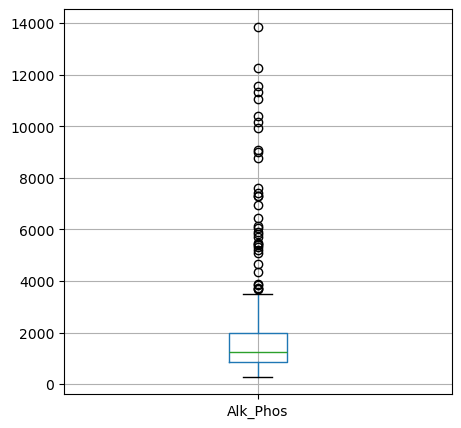

In [52]:
#Boxplot....boxplots are designed to show the spread of the data and help identify outliers

df.boxplot(column='Alk_Phos',
          figsize=(5,5))
#titanic_train["Fare"].plot(kind="box",
#                           figsize=(9,9))

<Axes: title={'center': 'Alk_Phos'}, xlabel='Sex'>

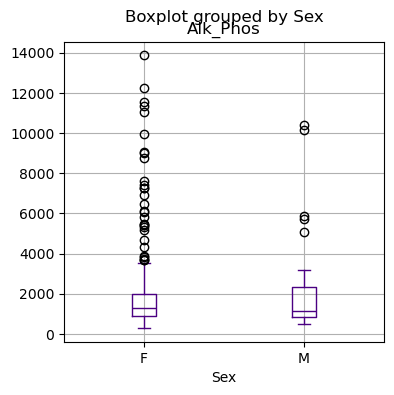

In [66]:
df.boxplot(column='Alk_Phos',
        by='Sex',
        figsize=(4,4),
       color='indigo')

<Axes: title={'center': 'Cholesterol'}, xlabel='Status'>

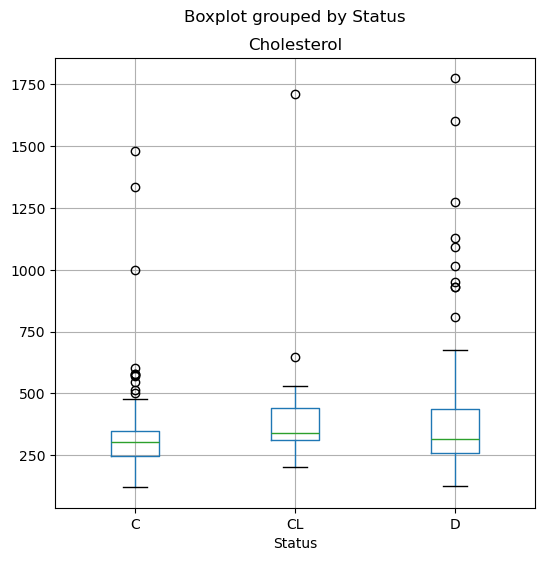

In [62]:
#Side by side boxplot: One of the most useful features of a boxplot is the ability to make side-by-side boxplots. 
#A side-by-side boxplot takes a numeric variable and splits it on based on some categorical variable, 
#drawing a different boxplot for each level of the categorical variable.

df.boxplot(column='Cholesterol',     #Column to plot
          by='Status',               #Column to split upon
          figsize=(6,6))                          #figure size


<Axes: ylabel='Density'>

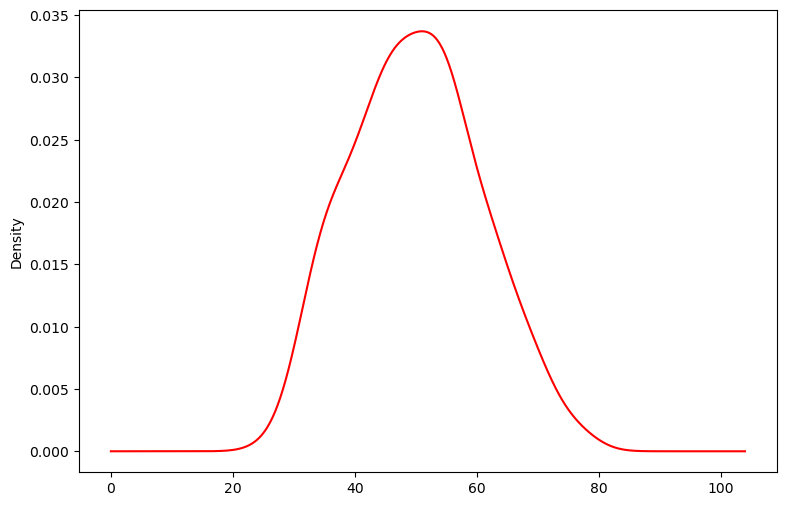

In [71]:
#Density plot for age
df['Age'].plot.density(figsize=(9,6),
                       color='red')

                    

AttributeError: 'numpy.float64' object has no attribute 'lines'

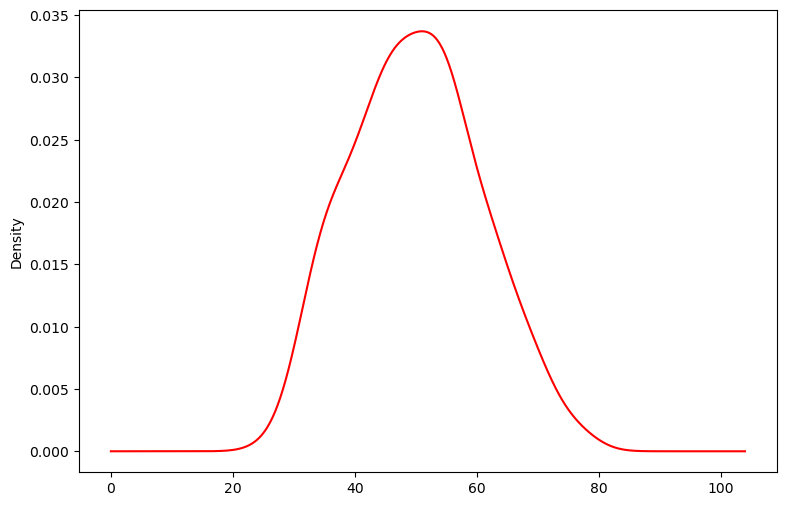

In [76]:
#Density plot for age
df['Age'].plot.density(figsize=(9,6),
                       color='red')

plt.vlines(df['Age'].mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.04,
           linewidth=2.0,
          color='black');

plt.vlines(df['Age'].median(),   # Plot red line at median
           ymin=0, 
           ymax=0.04, 
           linewidth=2.0,
           color="red");

In [73]:
df['Age'].median()

50.0

<Axes: xlabel='Status'>

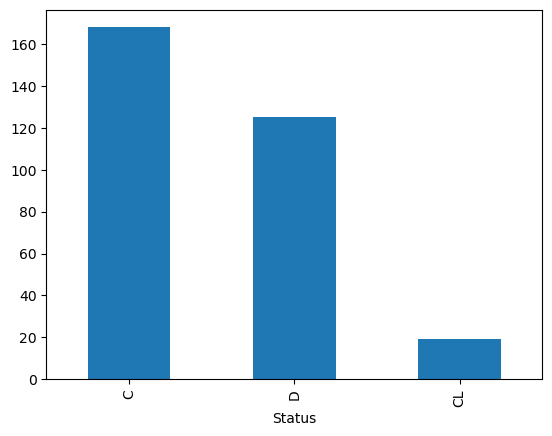

In [79]:
#To plot a a barchart, create a frequency table first
#df['Sex'].value_counts().plot(kind="bar")   #This works too
df['Status'].value_counts().plot.bar()

<Axes: xlabel='Copper', ylabel='Cholesterol'>

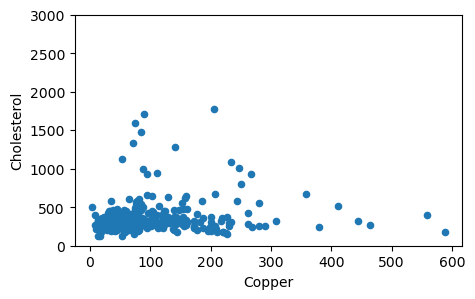

In [86]:
#Scatterplots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. 
df.plot.scatter(     
              x="Copper",          
              y="Cholesterol",          
              figsize=(5,3),
              ylim=(0,3000))

In [36]:
df.head(1)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


In [37]:
#Columns with Alk_Phos boxplot showed lots of outliers, hence I want to explore more
maxAlk_Phos = np.where(df["Alk_Phos"] == max(df["Alk_Phos"]))

df.loc[maxAlk_Phos]



,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
55,56,1847,D,Placebo,34.0,F,N,Y,Y,N,1.1,498.0,3.8,88.0,13862.4,95.46,319.0,365.0,10.6,2.0


In [38]:
np.where(df["Alk_Phos"] == max(df["Alk_Phos"]) )

(array([55]),)

#Explore some frequency
pd.crosstab(index=df['Status'],
              columns='counts', Margins=True)

In [40]:
df.head(1)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


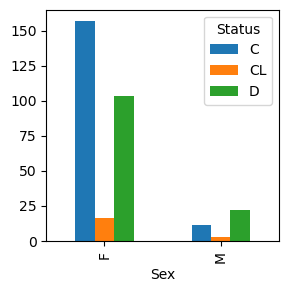

In [41]:
#df.barplots(column=df['Sex'],
#          figsize=(7,5) )
chart=pd.crosstab(index=df['Sex'],
           columns=df['Status'])

chart.plot(kind="bar",
                 figsize=(3,3));



<Axes: xlabel='Copper'>

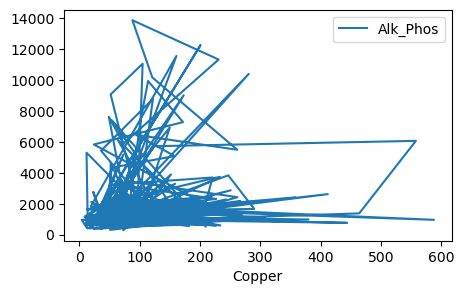

In [42]:
#Line plots are bivariate (two variable) plots that take two numeric variables and plot data points on the x/y plane. 
df.plot(x="Copper",          
         y="Alk_Phos",          
         figsize=(5,3))
   
              

In [43]:
df.head(1)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


<Axes: xlabel='Copper'>

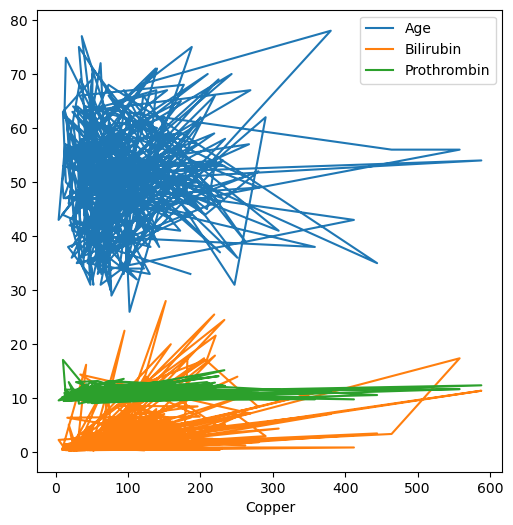

In [44]:
# Plot multiple numerical variables in a single line plot by passing a list of column names to the y parameter
df.plot(x="Copper",          
        y=["Age", "Bilirubin",
       "Prothrombin"],
        figsize=(6,6))

In [45]:
df['Cholesterol'].std()

221.92302716014584

In [46]:
df['Cholesterol'].max() - df['Cholesterol'].min()

1655.0

In [47]:
max(df['Cholesterol'])

1775.0

In [48]:
df['Cholesterol'].skew()

3.61034179027873

In [49]:
#To determine confidence interval of Age
stats.t.interval(confidence = 0.95,              # Confidence level
                 df= len(df['Age'])-1,           # Degrees of freedom
                 loc = df['Age'].mean(),         # Sample mean
                 scale = df['Age'].std())         # Standard deviation estimate

(29.201759752904533, 70.84952229837752)

In [50]:
df.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0


In [99]:
#To determine if the difference in mean of ages of males and females are statistically significant

df.groupby('Sex')['Age'].mean()

Sex
F    49.221014
M    56.194444
Name: Age, dtype: float64

In [52]:
#Two-sample t-test
stats.ttest_ind(a= df[df['Sex'] == 'M']['Copper'],
                b= df[df['Sex'] == 'F']['Copper'],
                equal_var=False)    # This means they don't have equal variance. Default is set to True

TtestResult(statistic=3.676118254394388, pvalue=0.0006798398283583035, df=41.03936518019763)

In [110]:
df[df['Sex'] == 'F']['Copper'].count()


276

In [54]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [55]:
np.where(df.notnull())

(array([  0,   0,   0, ..., 311, 311, 311]),
 array([ 0,  1,  2, ..., 17, 18, 19]))

In [56]:
df['Status'].value_counts()

Status
C     168
D     125
CL     19
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Cholesterol'>

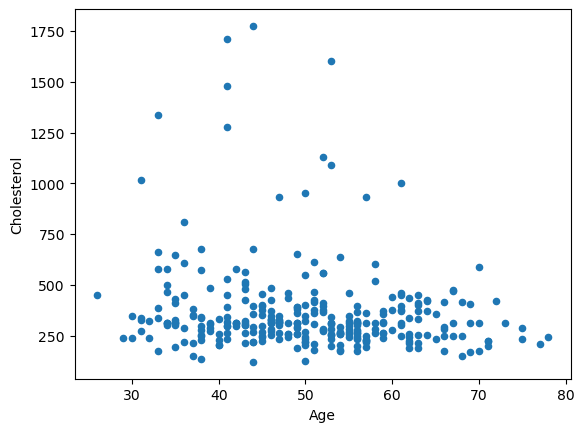

In [57]:
df.plot(kind='scatter',
       x='Age',
       y='Cholesterol')

In [58]:
#1. Initialise the model
regression_model = linear_model.LinearRegression()
#2. Train the model using your data
regression_model.fit(X=pd.DataFrame(df['Age']),
                    y=df['Cholesterol'])
#3. Check the trained model y-intercept
print(regression_model.intercept_)

#4. Check trained model coefficients
print(regression_model.coef_)


521.9234082654776
[-3.15435055]


In [59]:
#Model fit line at: Cholesterol = 521.92 - 3.15 * Age

#To assess the variance in the response variable as explained by the model using the model.score() function:
regression_model.score(X = pd.DataFrame(df["Age"]), 
                       y = df["Cholesterol"])

0.022628490128460466

In [60]:
train_prediction = regression_model.predict(X = pd.DataFrame(df["Age"]))

# Actual - prediction = residuals
residuals = df["Cholesterol"] - train_prediction

residuals.describe()

count    3.120000e+02
mean     1.421085e-14
std      2.193978e+02
min     -2.700581e+02
25%     -1.039760e+02
50%     -6.013526e+01
75%      3.587129e+01
max      1.391868e+03
Name: Cholesterol, dtype: float64

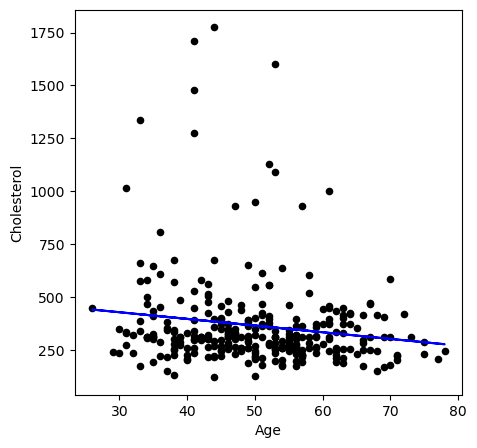

In [61]:
df.plot(kind="scatter",
           x="Age",
           y="Cholesterol",
           figsize=(5,5),
           color="black")

# Plot regression line
plt.plot(df["Age"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue");

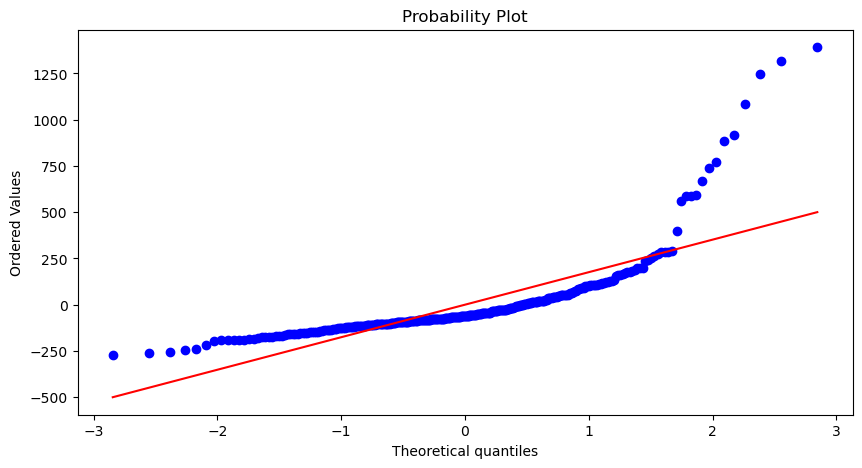

In [62]:
plt.figure(figsize=(10,5))

stats.probplot(residuals, dist="norm", plot=plt);

In [63]:

from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, df['Cholesterol'])**0.5

RMSE

219.04588703279

In [64]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [65]:
df['Status'].value_counts()

Status
C     168
D     125
CL     19
Name: count, dtype: int64

In [66]:
#First convert all CLs to C
df['Status'] = df['Status'].replace('CL', 'C')

df['Status'].value_counts()


Status
C    187
D    125
Name: count, dtype: int64

In [67]:
df['Status'].value_counts()

Status
C    187
D    125
Name: count, dtype: int64

In [68]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,C,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [69]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df["Sex"])

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

# Train the model
log_model.fit(X = pd.DataFrame(encoded_sex), 
              y = df["Status"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)


[-0.50529305]
[[0.85801356]]


In [70]:
#Let's use the model to make predictions on the test set:
# Make predictions
preds = log_model.predict_proba(X= pd.DataFrame(encoded_sex))
preds = pd.DataFrame(preds)
preds.columns = ["Death_prob", "Status_prob"]

# Generate table of predictions vs Sex
pd.crosstab(df["Sex"], preds.loc[:, "Status_prob"])

Status_prob,0.376298,0.587277
Sex,,
F,276,0
M,0,36


In [71]:
#Let's make a more complicated model that includes a few more variables from the data set:
# Convert more variables to numeric
encoded_drug = label_encoder.fit_transform(df["Drug"])
encoded_ascites = label_encoder.fit_transform(df["Ascites"])

train_features = pd.DataFrame([encoded_drug,
                              encoded_ascites,
                              encoded_sex,
                              df["Age"]]).T

# Initialize logistic regression model
log_model = linear_model.LogisticRegression(solver = 'lbfgs')

# Train the model
log_model.fit(X = train_features ,
              y = df["Status"])

# Check trained model intercept
print(log_model.intercept_)

# Check trained model coefficients
print(log_model.coef_)

[-2.6052128]
[[0.08202946 2.20138457 0.70590834 0.03831732]]


In [72]:
#Next, let's make class predictions using this model and then compare the predictons to the actual values:

# Make predictions
preds = log_model.predict(X= train_features)

# Generate table of predictions vs actual
pd.crosstab(preds,df["Status"])

Status,C,D
row_0,,
C,172,82
D,15,43


In [73]:
df.head(1)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


In [74]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = df["Status"])

DecisionTreeClassifier()

In [82]:
#Now let's view a visualization of the tree the model created. We can do this with the "graphviz" library:

# Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  


In [78]:
import graphviz
print(graphviz.__version__) 

0.20.3


In [84]:
print(graph)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.48\nsamples = 312\nvalue = [187, 125]"] ;
1 [label="gini = 0.468\nsamples = 276\nvalue = [173, 103]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.475\nsamples = 36\nvalue = [14, 22]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}



In [85]:
# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], df["Sex"])

Sex,F,M
row_0,,
0.388889,0,36
0.626812,276,0


In [90]:
# Make data frame of predictors
encoded_drug = label_encoder.fit_transform(df["Drug"])
predictors = pd.DataFrame([encoded_sex, encoded_drug]).T

# Train the model
tree_model.fit(X = predictors, 
               y = df["Status"])

DecisionTreeClassifier()

In [92]:
#Now let's look at the graph of the new decision tree model:
# Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
print(graph)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 0.5\ngini = 0.48\nsamples = 312\nvalue = [187, 125]"] ;
1 [label="x[1] <= 0.5\ngini = 0.468\nsamples = 276\nvalue = [173, 103]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.467\nsamples = 137\nvalue = [86, 51]"] ;
1 -> 2 ;
3 [label="gini = 0.468\nsamples = 139\nvalue = [87, 52]"] ;
1 -> 3 ;
4 [label="x[1] <= 0.5\ngini = 0.475\nsamples = 36\nvalue = [14, 22]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.444\nsamples = 21\nvalue = [7, 14]"] ;
4 -> 5 ;
6 [label="gini = 0.498\nsamples = 15\nvalue = [7, 8]"] ;
4 -> 6 ;
}



In [86]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,C,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
